<a href="https://colab.research.google.com/github/ubiratantavares/tcc_puc_minas/blob/main/predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliando as previsões do modelo selecionado com a base de dados de teste

In [ ]:
# importar bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

from collections import Counter

from joblib import load

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [ ]:
# carregar base de dados
def load_data(filename):
  path = "/content/drive/MyDrive/tcc/data/"
  path_filename = path + filename
  return pd.read_csv(path_filename, delimiter=',')

In [ ]:
# criar dataframes por meio do carregamento da base de dados de teste
df_X_test = load_data("x_test.csv")
df_y_test = load_data("y_test.csv")

In [ ]:
X_test = df_X_test.values
y_test = df_y_test.values
y_test = y_test.ravel()
print(X_test.shape, y_test.shape)

(17223, 83) (17223,)


In [ ]:
def summarize_class_distribution(atributo):
  counter = Counter(atributo)
  for k, v in counter.items():
    per = v / len(atributo) * 100
    print('Class= {}, Count= {}, Percentage= {:.2f}%'.format(k, v, per))

In [ ]:
# resumir total de cada classe do atributo alvo
summarize_class_distribution(y_test)

Class= 0, Count= 17030, Percentage= 98.88%
Class= 1, Count= 193, Percentage= 1.12%


In [ ]:
def load_model(filename):
  path = "/content/drive/MyDrive/tcc/models/"
  path_filename = path + filename
  return load(path_filename)

In [ ]:
# carregar modelo selecionado
model_select = load_model('model_select_version1.sav')

In [ ]:
score = model_select.score(X_test, y_test)
print("Score Model: {}".format(score))

Score Model: 0.9851361551413808


In [ ]:
# prever as classes com o  dados de teste no modelo selecionado
y_pred = model_select.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_confusion_matrix_display(y_true, y_pred, display_labels=[0,1]):
  cm = confusion_matrix(y_true, y_pred)
  cmp = ConfusionMatrixDisplay(cm,  display_labels=display_labels).plot()
  cmp.plot(ax=ax)

In [ ]:
def evaluate_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred, labels=[0, 1]))

In [ ]:
def evaluate_classification_report(y_true, y_pred):
  cl_report = classification_report(y_true, y_pred, labels=[0, 1])
  return cl_report

In [ ]:
def evaluate_accuracy_score(y_true, y_pred):
  print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))

In [ ]:
def evaluate_f2_measure(y_true, y_pred):
  print("F2-score: {:.2f}".format(fbeta_score(y_true, y_pred, beta=2)))

In [ ]:
# avaliar as previsões obtidos com o modelo selecionado comparando-as com os resultados esperados da base de dados de teste por meio da precisão da classificação
evaluate_accuracy_score(y_test, y_pred)

Accuracy: 0.99


In [ ]:
def evaluate_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
  return cm

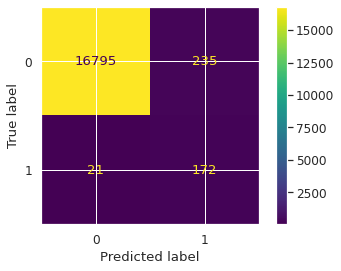

In [ ]:
# avaliar as previsões obtidos com o modelo selecionado comparando-as com os resultados esperados da base de dados de teste por meio da matriz de confusão
evaluate_confusion_matrix_display(y_test, y_pred)

In [ ]:
# avaliar as previsões obtidos com o modelo selecionado comparando-as com os resultados esperados da base de dados de teste por meio do relatório de classificação
evaluate_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17030
           1       0.42      0.89      0.57       193

    accuracy                           0.99     17223
   macro avg       0.71      0.94      0.78     17223
weighted avg       0.99      0.99      0.99     17223



In [ ]:
!pip install sklearn-evaluation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_evaluation import plot

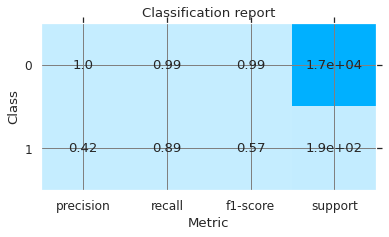

In [ ]:
target_names = ["0", "1"]

cr = plot.ClassificationReport.from_raw_data(y_test, y_pred, target_names=target_names)
cr

In [ ]:
# avaliar as previsões obtidos com o modelo selecionado comparando-as com os resultados esperados da base de dados de teste por meio da métrica f2
evaluate_f2_measure(y_test, y_pred)

F2-Measure: 0.73
